In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rng = np.random.RandomState(42)

In [3]:
column_names = ['engine_id', 'cycle', 'setting1', 'setting2', 'setting3'] + [f'sensor{i}' for i in range(1, 27)]
train_df = pd.read_csv('./dataset/train_FD001.txt', sep='\s+', header=None, names=column_names)
test_df = pd.read_csv('./dataset/test_FD001.txt', sep='\s+', header=None, names=column_names)
true_rul = pd.read_csv('./dataset/RUL_FD001.txt', header=None)

In [4]:
train_df.head()

,engine_id,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23,sensor24,sensor25,sensor26
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,392,2388,100.0,39.06,23.4190,NaN,NaN,NaN,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,392,2388,100.0,39.00,23.4236,NaN,NaN,NaN,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,390,2388,100.0,38.95,23.3442,NaN,NaN,NaN,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,392,2388,100.0,38.88,23.3739,NaN,NaN,NaN,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,393,2388,100.0,38.90,23.4044,NaN,NaN,NaN,NaN,NaN


In [5]:
test_df.head()

,engine_id,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23,sensor24,sensor25,sensor26
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,392,2388,100.0,38.86,23.3735,NaN,NaN,NaN,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,393,2388,100.0,39.02,23.3916,NaN,NaN,NaN,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,393,2388,100.0,39.08,23.4166,NaN,NaN,NaN,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,391,2388,100.0,39.00,23.3737,NaN,NaN,NaN,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,390,2388,100.0,38.99,23.4130,NaN,NaN,NaN,NaN,NaN


In [6]:
# Dropping NA columns for train_df
train_df = train_df.dropna(axis=1, how="all")
train_df.head()

,engine_id,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [7]:
# Dropping NA columns for test_df
test_df = test_df.dropna(axis=1, how="all")
test_df.head()

,engine_id,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [8]:
sensors_col_index = list(range(5, len(train_df.columns)))
print(sensors_col_index)
sensors_col_names = train_df.columns[sensors_col_index]
print(sensors_col_names)
settings_col_index = list(range(2, 5))
settings_col_names = train_df.columns[settings_col_index]

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
Index(['sensor1', 'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6',
       'sensor7', 'sensor8', 'sensor9', 'sensor10', 'sensor11', 'sensor12',
       'sensor13', 'sensor14', 'sensor15', 'sensor16', 'sensor17', 'sensor18',
       'sensor19', 'sensor20', 'sensor21'],
      dtype='object')


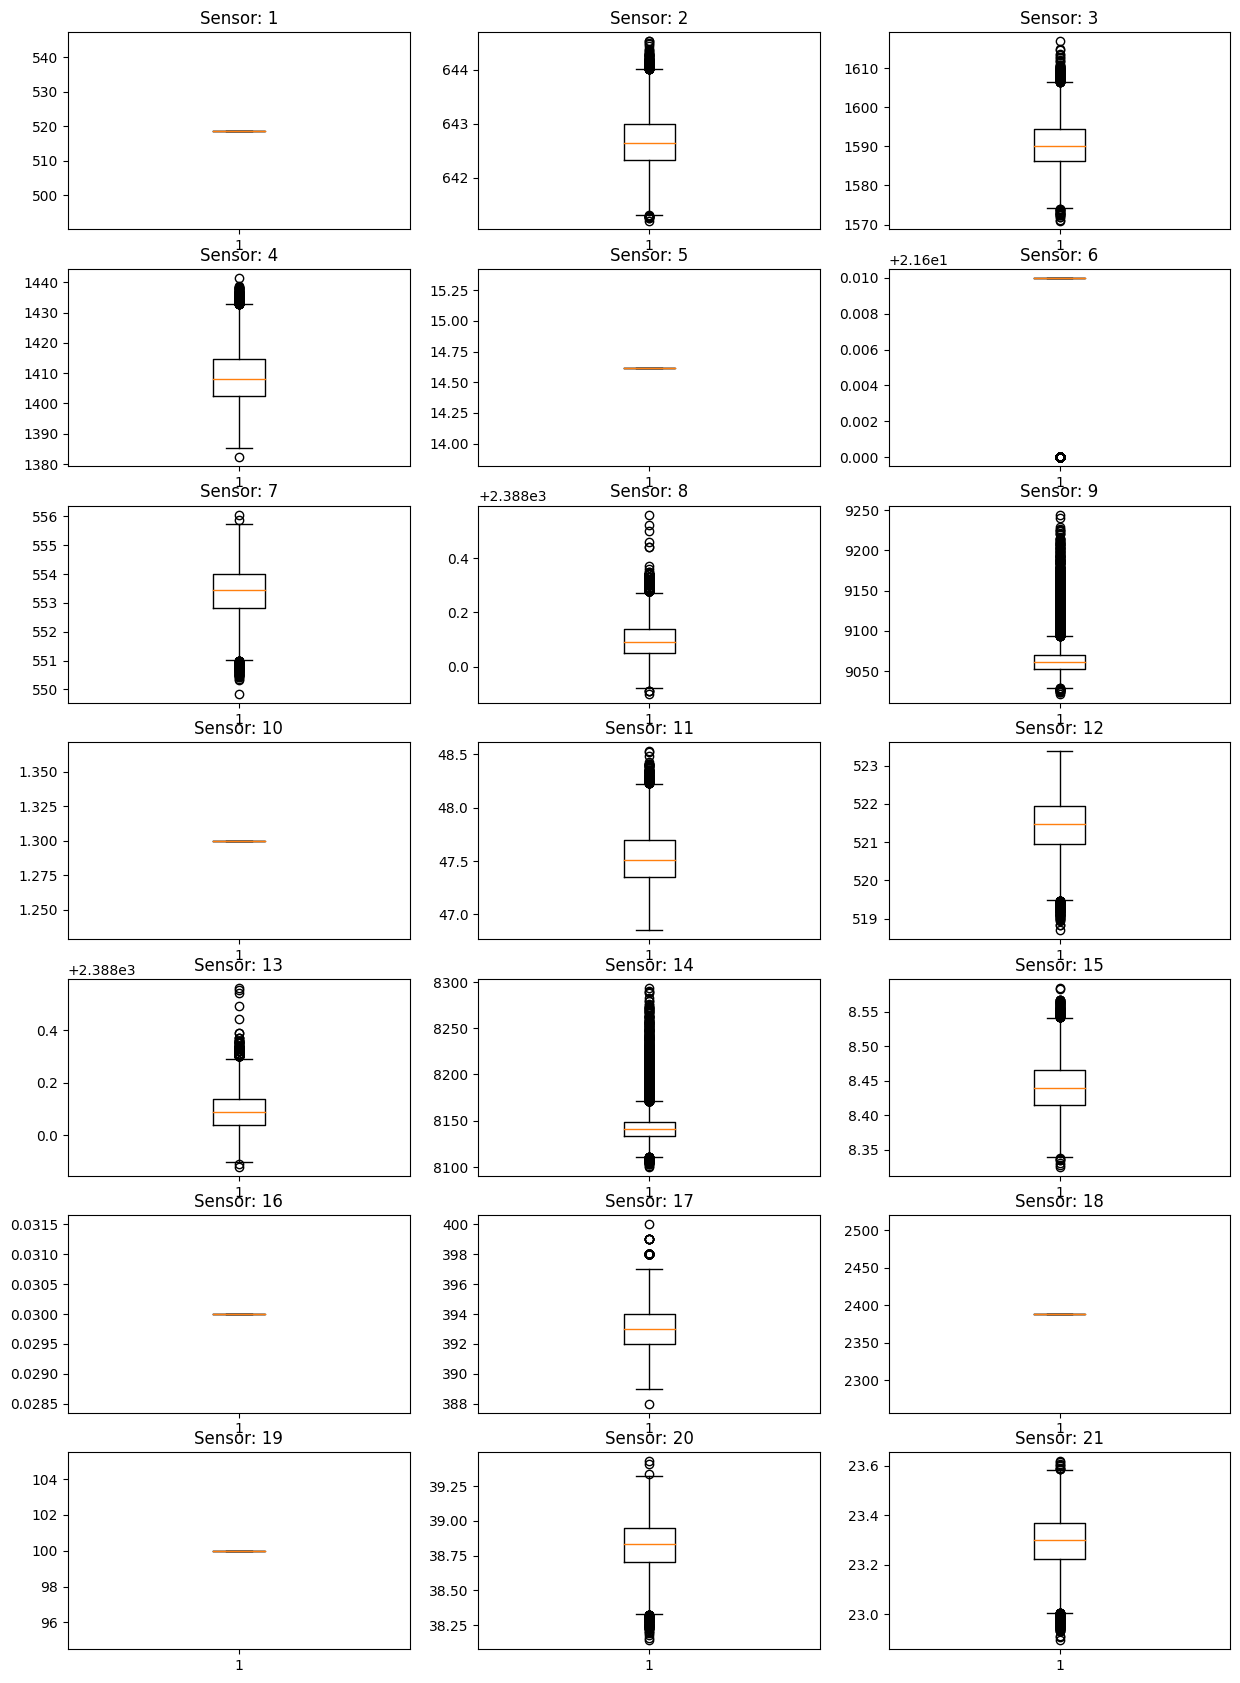

In [9]:
### Exploratory Analysis of Sensors

# Box Plot
plt.figure(figsize = (15, 21))
for i in np.arange(5, 26):        # column 5 in python means actual 6th column
    temp = train_df.iloc[:, i]
    plt.subplot(7,3, i-4)
    plt.boxplot(temp)
    plt.title("Sensor: "+ str(i-4))
plt.show()

## Sensor 1, 5, 10 , 16, 18, 19

In [10]:
# Retrieving Random Unique Engines
random_engines = train_df['engine_id'].sample(n=10, random_state=rng).unique()
random_engines

array([69,  8, 48, 54, 96, 78, 27, 40, 90], dtype=int64)

In [11]:
# Rows containing the stipulated engines above
rand_engine_df = train_df[train_df['engine_id'].isin(random_engines)]
# rand_engine_df.describe()
# rand_engine_df['engine_id'].unique()

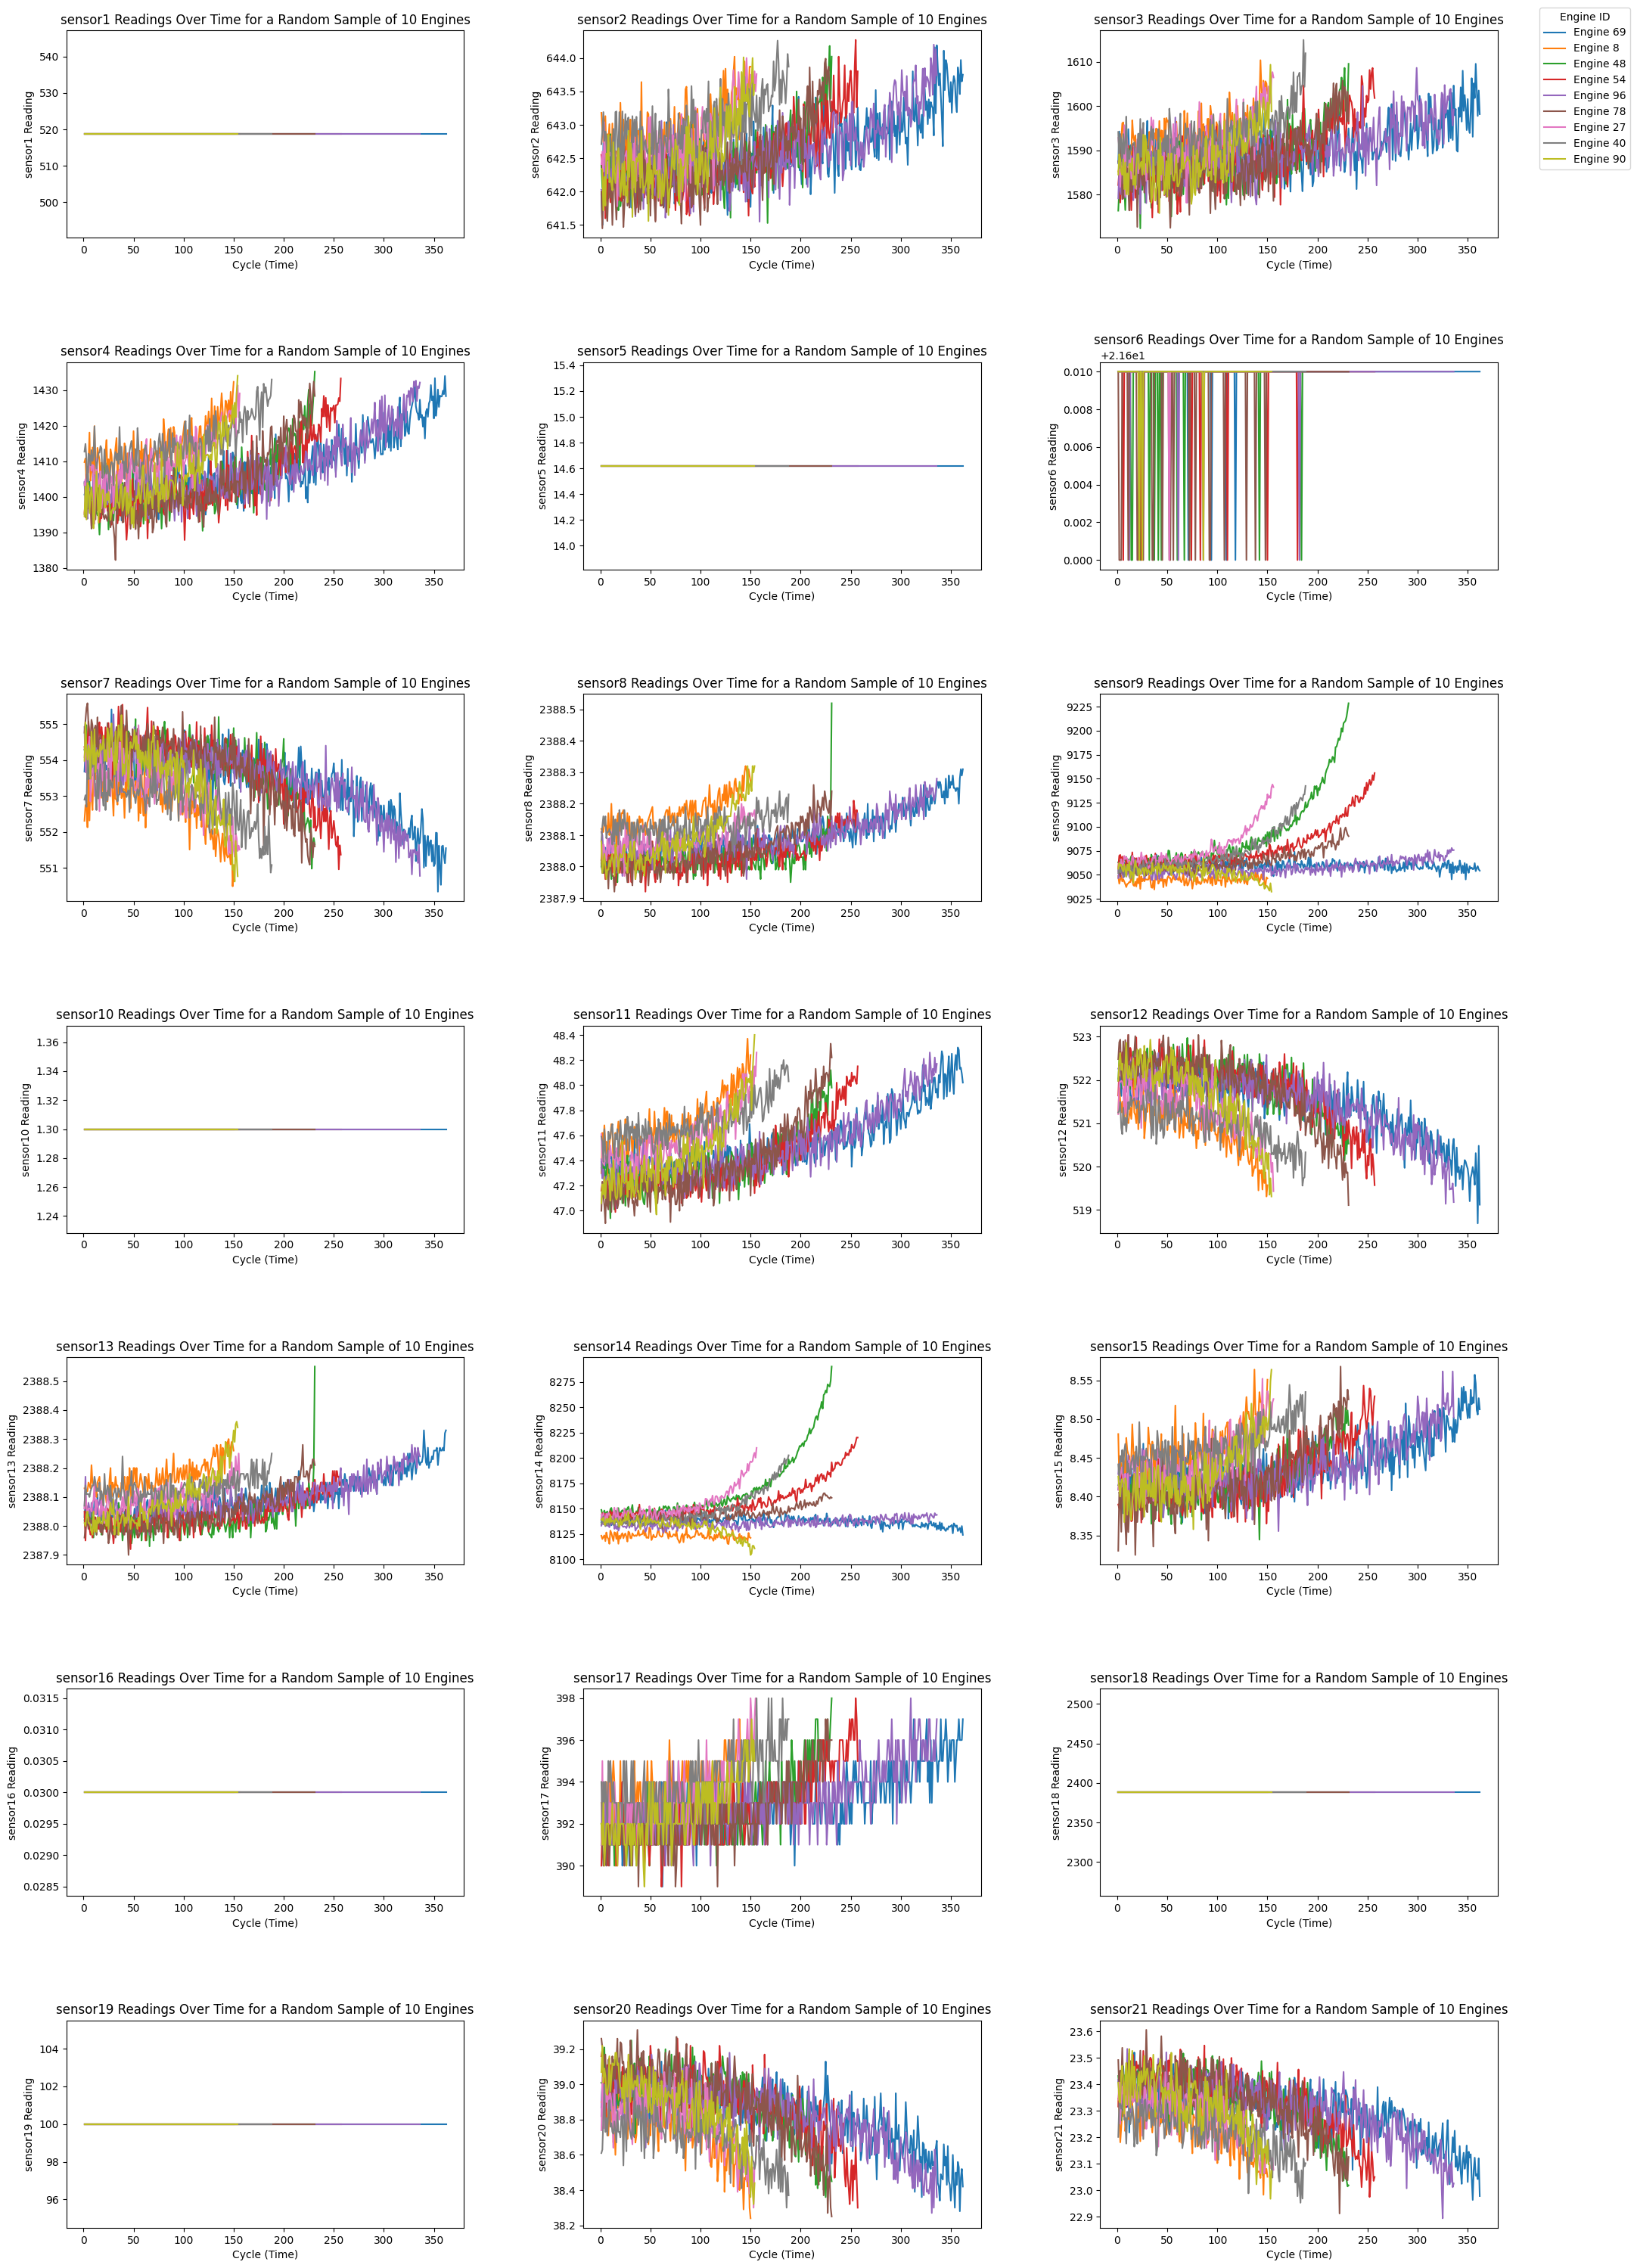

In [12]:
# All sensors plot
# fig, axes = plt.subplots(len(sensors_col_index), 1, figsize=(14, 6 * len(sensors_col_index)))
fig, axes = plt.subplots(7, 3, figsize=(20, 30))
for i, sensor in enumerate(sensors_col_names):
    # ax = axes[i] if len(sensors_col_index) > 1 else axes
    # ax = axes[i]
    row = i // 3
    col = i % 3
    ax = axes[row, col]  # Access each subplot in the grid
    for engine_id in random_engines:
        engine_data = train_df[train_df['engine_id'] == engine_id]
        if i == 0:
            ax.plot(engine_data['cycle'], engine_data[sensor], label=f'Engine {engine_id}')
        else:
            ax.plot(engine_data['cycle'], engine_data[sensor])
    ax.set_title(f'{sensor} Readings Over Time for a Random Sample of 10 Engines')
    ax.set_xlabel('Cycle (Time)')
    ax.set_ylabel(f'{sensor} Reading')
    # ax.legend(title='Engine ID', bbox_to_anchor=(1.05, 1), loc='upper left')

fig.legend(title='Engine ID', bbox_to_anchor=(1.05, 1), loc='upper center')
plt.tight_layout()
fig.subplots_adjust(hspace=0.6, wspace=0.3)
# Reference: Figure 8 in https://dl-acm-org.libproxy1.nus.edu.sg/doi/10.1145/3486252#fig8
# Features dropped in the paper: 1, 5, 10, 16 and 19

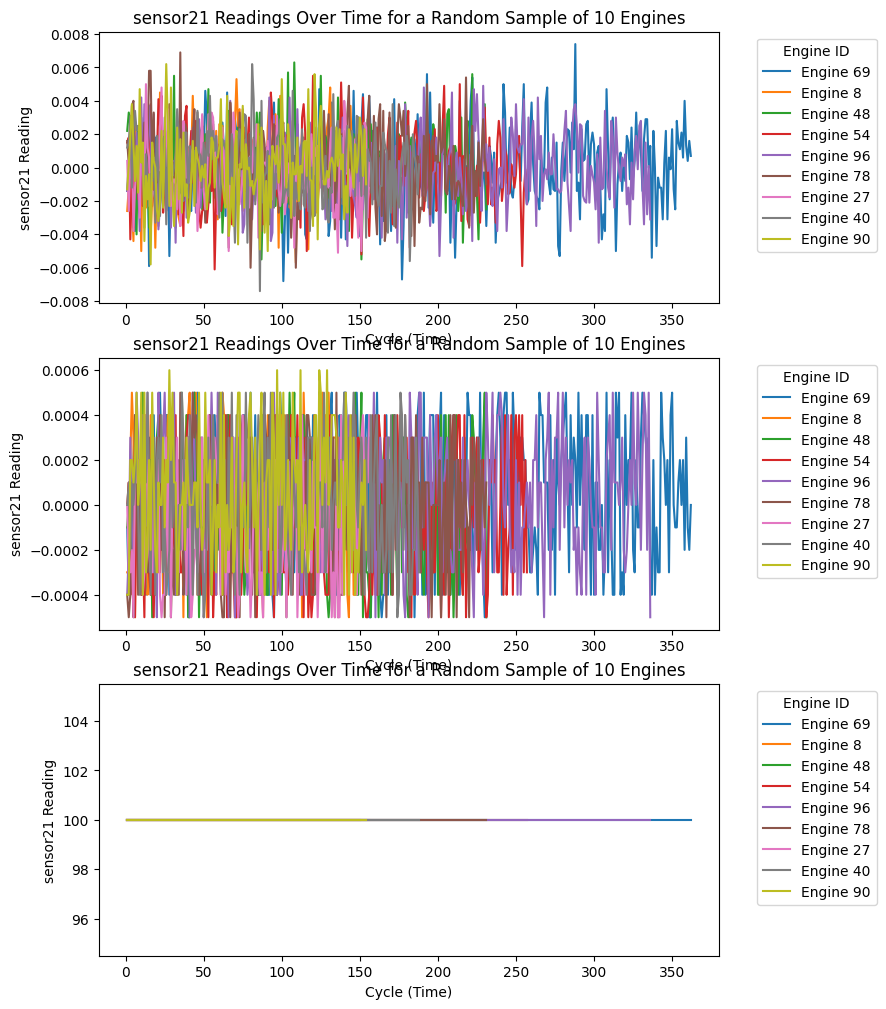

In [13]:
# Plotting  the settings
fig, axes = plt.subplots(3, 1, figsize=(8, 12))
for i, setting in enumerate(settings_col_names):
    # ax = axes[i] if len(sensors_col_index) > 1 else axes
    ax = axes[i]
    for engine_id in random_engines:
        engine_data = train_df[train_df['engine_id'] == engine_id]
        ax.plot(engine_data['cycle'], engine_data[setting], label=f'Engine {engine_id}')

    ax.set_title(f'{sensor} Readings Over Time for a Random Sample of 10 Engines')
    ax.set_xlabel('Cycle (Time)')
    ax.set_ylabel(f'{sensor} Reading')
    ax.legend(title='Engine ID', bbox_to_anchor=(1.05, 1), loc='upper left')